# Kidney: Weibull regression with random efects
**Objective** : The objective of this study is to analyze time to first and second recurrence of infection in kidney patients on dialysis. The analysis uses a Weibull regression model with random effects and includes age, sex, and underlying disease as risk variables. The aim is to identify the risk factors associated with recurrence of infection in kidney patients.

## 1. Data

Description : 
- $t_{ij}$ : is the survivor function for i = 1,...,38; j = 1,2 
- $b_i$ : is an additive random effect for each patient in the exponent of the hazard 
- $AGE_{ij}$ :  
- $SEX_i$ :
- $Disease_{ik}(k = 1,2,3)$ 

In [125]:
import numpy as np
import pandas as pd
from tqdm import trange
from typing import Tuple
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
NP = 38 # Number of pations 
N_uc = 58 
N_rc = 18 

t_uc = np.asarray([8, 23, 22, 447, 30, 24, 7, 511, 53, 15, 7, 141, 96, 536, 17, 
185, 292, 15, 152, 402, 13, 39, 12, 132, 34, 2, 130, 27, 152, 
190, 119, 63, 16, 28, 318, 12, 245, 9, 30, 196, 154, 333, 38, 
177, 114, 562, 66, 40, 201, 156, 30, 25, 26, 58, 43, 30, 8, 78])

t_rc = np.asarray([149, 22, 113, 5, 54, 6, 13, 8, 70, 25, 4, 159, 108, 24, 46, 
5, 16, 8])

age_uc = np.asarray([28, 48, 32, 31, 10, 16, 51, 55, 69, 51, 44, 34, 35, 17, 60, 
60, 43, 44, 46, 30, 62, 42, 43, 10, 52, 53, 54, 56, 57, 44, 22, 
60, 28, 32, 32, 10, 17, 51, 56, 69, 52, 44, 35, 60, 44, 47, 63, 
43, 58, 10, 52, 53, 54, 56, 51, 57, 22, 52])

age_rc = np.asarray([42, 53, 57, 50, 42, 52, 48, 34, 42, 17, 60, 53, 44, 30, 43, 
45, 42, 60])

sex_uc = np.asarray([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 
1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 
1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

sex_rc = np.asarray([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

patient_uc = np.asarray([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 
16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 
31, 33, 34, 35, 38, 1, 3, 4, 5, 6, 7, 8, 9, 10, 
11, 13, 17, 18, 21, 23, 25, 26, 27, 28, 29, 30, 31, 
32, 33, 35, 37])

patient_rc = np.asarray([14, 19, 26, 32, 36, 37, 2, 12, 14, 15, 16, 19, 
20, 22, 24, 34, 36, 38])

disease_uc = np.asarray([1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 3, 1, 3, 1, 3, 1, 1, 1, 4, 1, 
3, 3, 3, 2, 3, 2, 2, 3, 4, 2, 1, 4, 1, 1, 1, 1, 1, 2, 2, 3, 2, 
3, 3, 1, 1, 4, 3, 3, 3, 2, 3, 2, 2, 3, 3, 4, 1, 4])

disease_rc = np.asarray([3, 2, 3, 3, 1, 4, 2, 1, 3, 1, 3, 2, 1, 1, 3, 2, 1, 4])


In [147]:
df_rc = pd.DataFrame({'disease' : disease_rc, \
                    'patient' : patient_rc,\
                    'sex' : sex_rc ,\
                    'age' : age_rc, \
                    't' : t_rc, })

df_uc = pd.DataFrame({'disease' : disease_uc, \
                    'patient' : patient_uc,\
                    'sex' : sex_uc , \
                    'age' : age_uc , \
                    't' : t_uc})

df_rc.reset_index(drop=True, inplace=True)
df_uc.reset_index(drop=True, inplace=True)
#df_rc

In [148]:
df_uc

,disease,patient,sex,age,t
0,1,1,0,28,8
1,2,2,1,48,23
2,1,3,0,32,22
3,1,4,1,31,447
4,1,5,0,10,30
5,1,6,1,16,24
6,2,7,0,51,7
7,2,8,1,55,511
8,3,9,1,69,53
9,2,10,0,51,15


In [149]:
df_rc

,disease,patient,sex,age,t
0,3,14,1,42,149
1,2,19,1,53,22
2,3,26,1,57,113
3,3,32,1,50,5
4,1,36,1,42,54
5,4,37,1,52,6
6,2,2,1,48,13
7,1,12,1,34,8
8,3,14,1,42,70
9,1,15,1,17,25


In [150]:
df_rc["censored"]=1
df_uc["censored"]=0

In [151]:
df_rc

,disease,patient,sex,age,t,censored
0,3,14,1,42,149,1
1,2,19,1,53,22,1
2,3,26,1,57,113,1
3,3,32,1,50,5,1
4,1,36,1,42,54,1
5,4,37,1,52,6,1
6,2,2,1,48,13,1
7,1,12,1,34,8,1
8,3,14,1,42,70,1
9,1,15,1,17,25,1


In [152]:
df = pd.concat([df_rc, df_uc], axis = 0)

In [153]:
df

,disease,patient,sex,age,t,censored
0,3,14,1,42,149,1
1,2,19,1,53,22,1
2,3,26,1,57,113,1
3,3,32,1,50,5,1
4,1,36,1,42,54,1
...,...,...,...,...,...,...
53,3,31,1,56,58,0
54,3,32,1,51,43,0
55,4,33,1,57,30,0
56,1,35,1,22,8,0


# Model 

-   $t_{ij} \sim \text{Weibull}(r,\mu_{ij})$
- $\text{log}(\mu_{ij}) = \alpha + \beta_\text{age}Age_{ij} +\beta_\text{sex}SEX_{i} + \beta_\text{disease1}DISEASE_{i1} + \beta_\text{disease2}DISEASE_{i2} + \beta_\text{disease3}DISEASE_{i3} + b_i$ 

# Random effects
-   $b_i \sim \text{Normal}(0,\tau)$.

# Priors
-  $alpha \sim \text{Normal}(0,10^{-4})$.
-  $beta_{age} \sim \text{Normal}(0,10^{-4})$
-  $beta_{sex} \sim \text{Normal}(0,10^{-4})$
-  $beta_{disease1} = 0$ 
-  $beta_{diseasek} \sim \text{Normal}(0,10^{-4})$ for k=1,2,3 
- $\tau \sim \text{gamma}(10^{-3},10^{-3})$ 
- $r \sim \text{gamma}(1,10^{-3})$ 
- $\sigma = \frac{1}{\sqrt(\tau)}$ : s.d. of random effects

In [75]:
def init_chain_1():
    """
     Proposed 1st initialisation by the authors of the paper    
    """
    beta_age = 0
    beta_sex = 0 
    beta_disease=(np.NAN,0,0,0),
    alpha = 0
    r=1 
    tau=0.3
    b=np.zeros(NP)
    return alpha, beta_age, beta_sex, beta_disease, r, tau, b

def init_chain_2():
    """
     Proposed 2nd initialisation by the authors of the paper    
    """
    beta_age= -1
    beta_sex = 1
    beta_disease= (np.NAN,1,1,1),
    alpha = 1
    r= 1.5
    tau = 1
    b=np.zeros(NP)

    return alpha, beta_age, beta_sex, beta_disease, r, tau, b

In [124]:
import numpy as np
import pandas as pd
from scipy.stats import gamma, norm, truncnorm, weibull_min

def metropolis_hasting_logp(logp, proposal, theta, logp_current=None, args=None):
    if logp_current is None:
        logp_current = logp(theta, *args)
    
    theta_proposed = proposal(theta)
    logp_proposed = logp(theta_proposed, *args)
    accept_ratio = np.exp(logp_proposed - logp_current)
    
    if np.random.rand() < accept_ratio:
        return theta_proposed, logp_proposed
    else:
        return theta, logp_current

def weibull_log_likelihood(x, r, mu):
    return np.sum(r * np.log(x / mu) - (x / mu) ** r)

def logp_alpha(alpha, t, r, mu):
    mu_new = mu * np.exp(alpha)
    return weibull_log_likelihood(t, r, mu_new)

def logp_beta(beta, t, r, mu, X):
    mu_new = mu * np.exp(X * beta)
    return weibull_log_likelihood(t, r, mu_new)

def gibbs_sampler(data, n_iter):

    # Data
    N_uc, N_rc, t_uc, t_rc, age_uc, age_rc, sex_uc, sex_rc, disease_uc, disease_rc = data
    n_patients = NP
    
    # Initialize parameters    
    alpha, beta_age, beta_sex, beta_disease, r, tau, b= init_chain_1()
    

    # chaine
    chaine = {'alpha': np.zeros(n_iter+1),
             'beta_age': np.zeros(n_iter+1),
             'beta_sex': np.zeros(n_iter+1),
             'beta_disease': np.zeros((n_iter+1, 3)),
             'tau': np.zeros(n_iter+1),
             'b': np.zeros((n_iter+1, n_patients)),
             'r': np.zeros(n_iter+1)}

    return chaine 

n_iter = 1000
chaine = gibbs_sampler((N_uc, N_rc, t_uc, t_rc, age_uc, age_rc, sex_uc, sex_rc, disease_uc, disease_rc), n_iter)


In [94]:
beta_disease_0 = chaine["beta_disease"][:, 0]
beta_disease_1 = chaine["beta_disease"][:, 1]
beta_disease_2 = chaine["beta_disease"][:, 2]
alpha = chaine["alpha"]
beta_age = chaine["beta_age"]
beta_sex = chaine["beta_sex"]
tau = chaine["tau"]
b = chaine["b"]
r = chaine["r"]

In [100]:
results = pd.DataFrame({
    "alpha":alpha,
    "beta_age":beta_age,
    "beta_sex":beta_sex,
    "beta_disease_0":beta_disease_0,
    "beta_disease_1":beta_disease_1,
    "beta_disease_2":beta_disease_2,
    "tau":tau,
    "r":r
})

df = results.describe().T
df

,count,mean,std,min,25%,50%,75%,max
alpha,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_age,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_sex,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_disease_0,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_disease_1,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_disease_2,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tau,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
def plot(variable, ax):
    """ Function to plot the Markov chain for a given variable.
    """
    sns.lineplot(
        data=results,
        x=results.index,
        y=variable,
        ax =ax,
    )

    # Add mean line
    mean = results[variable].mean()
    std = results[variable].std()
    ax.axhline(y=mean, color="r", linestyle="--", label="Mean")
    ax.axhline(y=mean+std, color="b", linestyle="--", label="+std", alpha = 0.5)
    ax.axhline(y=mean-std, color="b", linestyle="--", label="-std", alpha = 0.5)

    ax.fill_between(results.index, mean-std, mean+std, alpha=0.2)

In [112]:
results_columns_1 = ['alpha', 'beta_age', 'beta_sex',  'r']

results_columns_2 = ['beta_disease_0', 'beta_disease_1',
       'beta_disease_2', 'tau']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


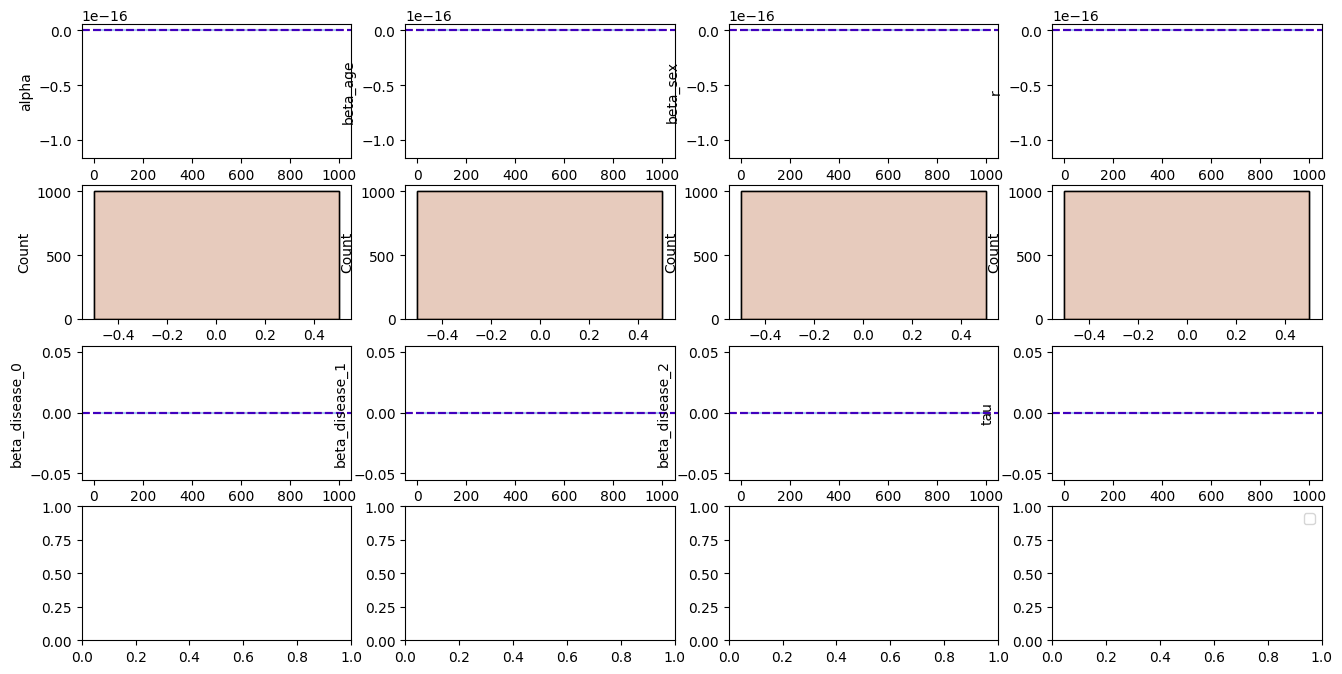

In [123]:
sns.set_palette("pastel")

fig, axs = plt.subplots(4,4)
fig.set_size_inches(16,8)


for i, variable in enumerate(results_columns_1):
    plot(variable, axs[0][i] )
    sns.histplot(results, x=variable, kde="True", fill=True,ax=axs[1][i])

for i, variable in enumerate(results_columns_2):
    plot(variable, axs[2][i] )
    sns.histplot(results, x=variable, kde="True", fill=True,ax=axs[1][i])


plt.legend()
plt.show()